In [3]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

from matplotlib import patches
import shapely.geometry as sg
import descartes

In [9]:
# HIDDEN
def show_intersection():
    plt.figure(figsize=(5, 5))
    # create the circles with shapely
    a = sg.Point(-.5,0).buffer(1.0)
    b = sg.Point(0.5,0).buffer(0.75)

    # compute the 3 parts
    left = a.difference(b)
    right = b.difference(a)
    middle = a.intersection(b)

    # use descartes to create the matplotlib patches
    ax = plt.subplot(111)
    ax.add_patch(descartes.PolygonPatch(left, fc='darkblue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='k', alpha=0.6))
    ax.add_patch(descartes.PolygonPatch(middle, fc='olive', ec='k', alpha=0.8))
    ax.annotate('A', [-0.5, 0])
    ax.annotate('B', [0.5, 0])

    # control display
    plt.title('Two Events')
    plt.axis('off')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')


### Union of Several Events ###
The third axiom of probability says that if $A$ and $B$ are two mutually exclusive events, then $P(A \cup B) = P(A)+P(B)$. We have happily extended this to the union of several mutually exclusive events and used it throughout:
$$
P(\bigcup_{i=1}^n A_i) = \sum_{i=1}^n P(A_i) ~~~ \text{ if }
A_iA_j = \phi \text{ for all } i \ne j
$$

But we never proved the result for more than two mutually exclusive events. Let's do that now by induction. The axiom says the result is true for $n=2$, so we will assume it is true for $n$ as above and then show that 
$$
P(\bigcup_{i=1}^{n+1} A_i) = \sum_{i=1}^{n+1} P(A_i) ~~~ \text{ if }
A_iA_j = \phi \text{ for all } i \ne j
$$

The induction is straightforward.

\begin{align*}
P(\bigcup_{i=1}^{n+1} A_i) &= P\big{(}(\cup_{i=1}^n A_i)\cup A_{n+1}\big{)} \\
&= P\big{(}(\cup_{i=1}^n A_i)\big{)} + P(A_{n+1}) ~~~ \text{(addition rule)} \\
&= \sum_{i=1}^n P(A_i) + P(A_{n+1}) ~~~~~~~ \text{(induction hypothesis)} \\
&= \sum_{i=1}^{n+1} P(A_i)
\end{align*}

### An Inclusion-Exclusion Formula ###
How would we find the chance of a union of two events that are not mutually exclusive? The diagram below shows two such events. The union is the entire colored region: the blue, the gold, as well as the intersection.

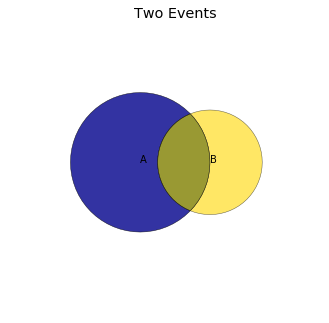

In [11]:
show_intersection()

We can find $P(A \cup B)$ by partitioning. A partition of $A \cup B$ is "all of $A$ union the part of $B$ that is not also in $A$": 
$$
A \cup B = A \cup (B \backslash AB)
$$
Therefore

\begin{align*}
P(A \cup B) &= P(A) + P(B \backslash AB) ~~~~~~~~~~ \text{(addition rule)} \\
&= P(A) + P(B) - P(AB) ~~~ \text{(difference rule)}
\end{align*}

We now have a formula for the case $n = 2$. It calculates the probability of the union of two events, by first *including* the chance of each event, and then *excluding* the chance of the intersection. This gives rise to its name:

#### Inclusion-Exclusion Formula: Union of Two Events ####
$$
P(A \cup B) = P(A) + P(B) - P(AB)
$$

### Union of $n$ Events ###
For a general $n$, we are going to guess the formula and prove it by induction. Let $A_1, A_2, \ldots , A_n$ be events, and let us try to find
$$
P\big{(}\bigcup_{i=1}^n A_i \big{)}
$$

Writing will be easier if we have some rough-and-ready abbreviations of descriptions, so for example let "all the double-intersections" mean "all terms of the form $P(A_iA_j)$ where $i$ and $j$ are different".

It is important to note that the set "$1 \le i < j \le n$" specifies all unordered pairs of distinct indices. If the indices are distinct, one of them has to be less than the other, so it is part of the indicated set. If $i$ and $j$ are in the set, then $i < j$, so $i$ and $j$ are distinct.

In the same way, $1 \le i < j < k \le n$ specifies all unordered triples of distinct indices. And so on.

**Guess.** Based on what we saw for two events, we will guess that the chance of the union of $n$ events can be calculated by:
- including all the events; then
- excluding all the double-intersections; then
- including all the triple-intersections; and so on.

### General Inclusion-Exclusion Formula ###
For events $A_1, A_2, \ldots, A_n$, 

\begin{align*}
P\big{(}\bigcup_{i=1}^n A_i \big{)} &=
\sum_{i=1}^n P(A_i) - \mathop{\sum \sum}_{1 \le i < j \le n} P(A_iA_j)
+ \mathop{\sum \sum \sum}_{1 \le i < j < k \le n} P(A_iA_jA_j) - \cdots
+ (-1)^{n+1} P(A_1A_2 \ldots A_n)
\end{align*}

Let's be fearless and prove this by induction. We know that it is true for $n=2$, so we must assume the induction hypothesis that it is true for $n$ as stated above and then show the following:


\begin{align*}
P\big{(}\bigcup_{i=1}^{n+1} A_i \big{)} &=
\sum_{i=1}^{n+1} P(A_i) - \mathop{\sum \sum}_{1 \le i < j \le n+1} P(A_iA_j)
+ \mathop{\sum \sum \sum}_{1 \le i < j < k \le n+1} P(A_iA_jA_j) - \cdots
+ (-1)^n P(A_1A_2 \ldots A_{n+1})
\end{align*}

The key is to observe that each sum above splits in two parts: the terms that only involve the indices 1 through $n$, and those that involve the index $n+1$.

Let $B = \bigcup_{i=1}^n A_i$. Then

\begin{align*}
P\big{(}\bigcup_{i=1}^{n+1} A_i \big{)} &= P(B \cup A_{n+1}) \\
&= P(B) + P(A_{n+1}) - P(BA_{n+1})
\end{align*}
by using the result for two events.

By the induction hypothesis,

\begin{align*}
P(B) &=
\sum_{i=1}^n P(A_i) - \mathop{\sum \sum}_{1 \le i < j \le n} P(A_iA_j)
+ \mathop{\sum \sum \sum}_{1 \le i < j < k \le n} P(A_iA_jA_j) - \cdots
+ (-1)^{n+1} P(A_1A_2 \ldots A_n)
\end{align*}

That means we've already got all the terms that involve on the indices 1 through $n$. Now we need only the terms that involve $A_{n+1}$. We can see one of those: $P(A_{n+1})$. That completes the first term in the right hand side of what we have to prove, which is the sum of all $n+1$ probabilities.

To complete the second sum, we need all terms of the form $P(A_iA_{n+1})$, and we have to remember the negative sign. These terms must come from the term $-P(BA_{n+1})$. How?

Notice that
$$
BA_{n+1} = \big{(}\bigcup_{i=1}^n A_i \big{)} \cap A_{n+1}
= \bigcup_{i=1}^n A_iA_{n+1}
$$

That is a union of $n$ events, so we can use the induction hypothesis to find it by inclusion-exclusion. Notice that 
$$
(A_iA_{n+1})\cap(A_jA_{n+1}) = A_iA_jA_{n+1}
$$

So

\begin{align*}
-P(BA_{n+1}) &= -P(\bigcup_{i=1}^n A_iA_{n+1}) \\
&= -\sum_{i=1}^n P(A_iA_{n+1}) + \mathop{\sum \sum}_{1 \le i < j \le n} P(A_iA_jA_{n+1}) + \cdots + (-1)^n P(A_1A_2 \ldots A_{n+1})
\end{align*}

These are exactly the remaining terms that we need. The induction is complete.

### The Number of Terms in Each Sum ###
To end this section we will count the number of terms in each of the sums in the inclusion-exclusion formula, so we know the extent of the work that has to be done to apply it.

Here is the formula again for reference:

\begin{align*}
P\big{(}\bigcup_{i=1}^n A_i \big{)} &=
\sum_{i=1}^n P(A_i) - \mathop{\sum \sum}_{1 \le i < j \le n} P(A_iA_j)
+ \mathop{\sum \sum \sum}_{1 \le i < j < k \le n} P(A_iA_jA_j) - \cdots
+ (-1)^{n+1} P(A_1A_2 \ldots A_n)
\end{align*}

Clearly there are $n$ terms in the first sum. For reasons that will become clear in the next step, we will write that as
$$
\binom{n}{1} = n
$$

In the second sum the terms correspond to distinct unordered pairs chosen from the indices 1 through $n$. That number is
$$
\binom{n}{2} = \frac{n(n-1)}{2}
$$

In the third sum, the number of terms is the number of sets of three:
$$
\binom{n}{3} = \frac{n(n-1)(n-2)}{3!}
$$
and so on.

This shows that a lot of terms are being added and subtracted in the inclusion-exclusion formula. 

But sometimes we get lucky, and many of the terms are equal. Then the sums simplify dramatically. For a beautiful example, keep reading.